In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

In [3]:
digit = load_digits()

In [4]:
#It tells the directory of the load data
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
#it tell the image 8*8 data but in 1D array so there the 64 elements.

digit.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

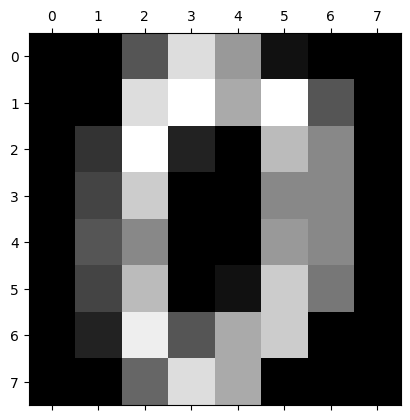

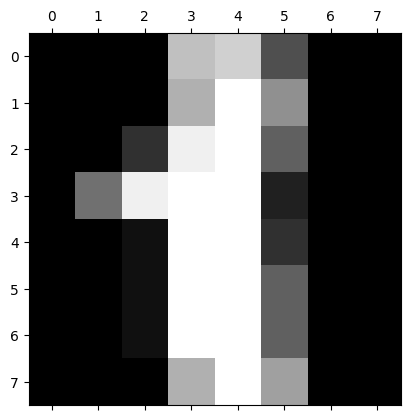

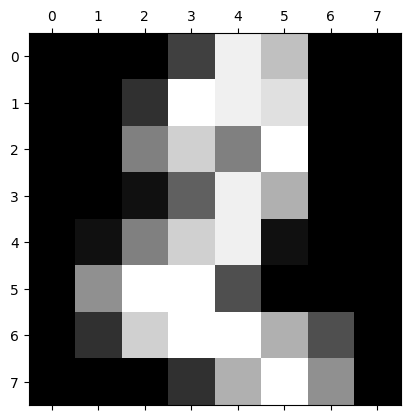

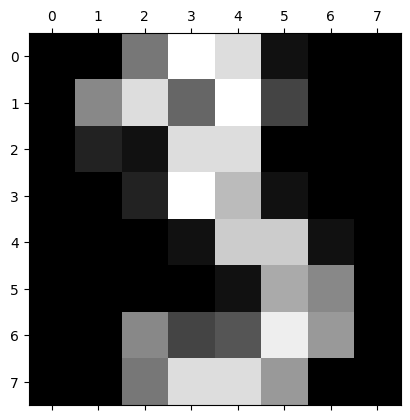

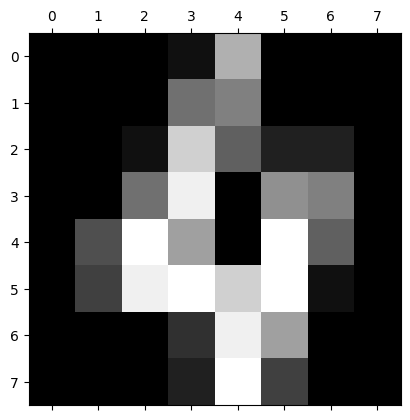

In [6]:
#Here the same data is printed in image form using matshow feature

plt.gray()
for i in range(5):
    plt.matshow(digit.images[i])

In [7]:
digit.target[0:5]
    

array([0, 1, 2, 3, 4])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test = train_test_split(digit.data,digit.target,test_size=0.2,random_state=10)

In [10]:
len(x_train)


1437

In [11]:
len(x_test)

360

In [12]:
from sklearn.linear_model import LogisticRegression
obj = LogisticRegression()

In [13]:
obj.fit(x_train,y_train)

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
x_test

array([[ 0.,  0.,  8., ...,  0.,  0.,  0.],
       [ 0.,  1., 13., ..., 16., 16.,  0.],
       [ 0.,  1., 13., ...,  1.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 15.,  5.,  0.],
       [ 0.,  0.,  0., ..., 12.,  1.,  0.],
       [ 0.,  1., 12., ...,  6.,  0.,  0.]])

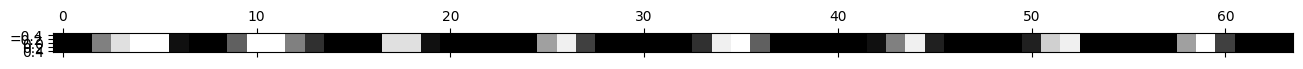

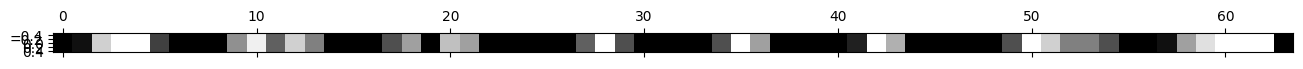

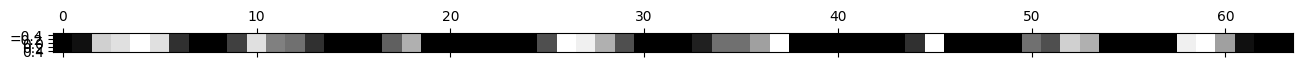

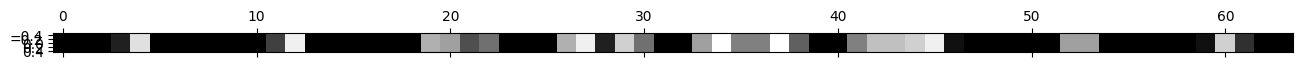

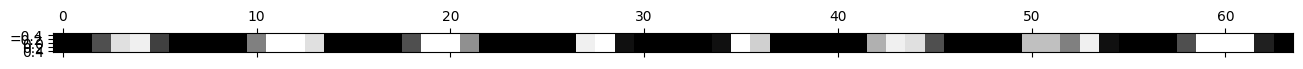

In [17]:
for i in range(5):
    plt.matshow(x_test[[i]])

In [19]:
obj.predict(x_train)

array([2, 1, 9, ..., 1, 8, 2])

In [20]:
obj.score(x_test,y_test)

0.95

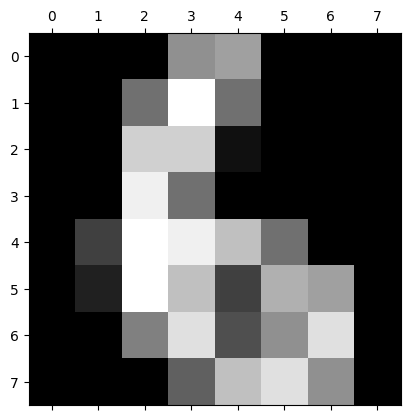

In [21]:
plt.matshow(digit.images[65])

In [22]:
digit.target[67]

6

In [23]:
obj.predict([digit.data[65]])

array([6])

In [24]:
obj.predict(digit.data[0:65])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 5, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4])

# Confusion matrix

#it is used to check the model's limit

In [27]:
y_pred = obj.predict(x_test)
from sklearn.metrics import confusion_matrix

In [28]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  1,  0,  1,  0,  0,  0,  1,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 38,  0,  1,  0,  0,  0,  0],
       [ 1,  1,  0,  0, 31,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0, 30,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  1],
       [ 0,  0,  1,  0,  0,  0,  1,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  2, 36]], dtype=int64)

# Confusion martix visualization

In [ ]:
pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ------------ -------------------------- 92.2/294.9 kB 655.4 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 819.2 kB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Text(95.72222222222221, 0.5, 'Truth')

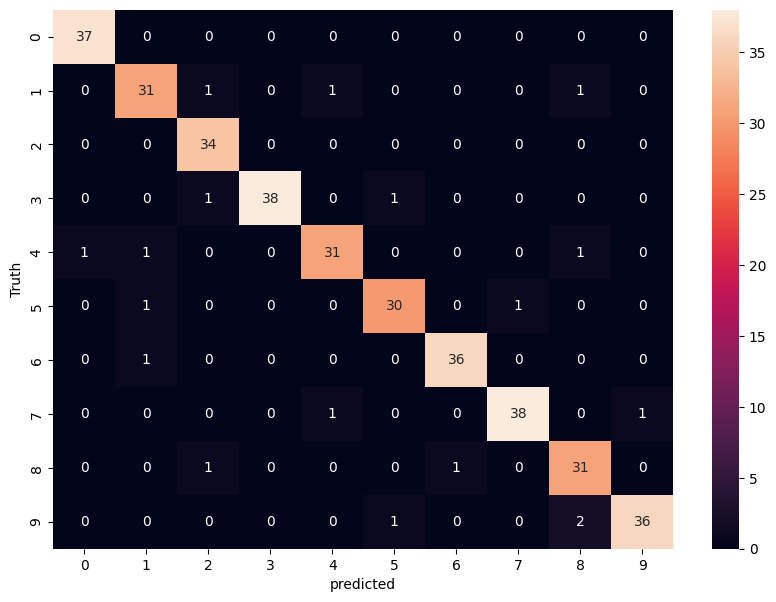

In [43]:
import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot = True,fmt = 'd')         #annot=True: Annotates each cell with its value, which is useful for precise data interpretation.
plt.xlabel("predicted")
plt.ylabel("Truth")